# Modelos Redes Neurais
## Cabeçalho
Criado por: Danilo Steckelberg <br>
Criado para: Trabalho de conclusão de curso IBM Deep Learning (https://www.coursera.org/learn/deep-learning-reinforcement-learning) <br>
Criado em: 2023-01-06 <br>
Direitos dos dados: Evi Brasil <br>

## Carregar dados
Origem dos dados: Rotina em R [File](file://C:\\Users\\danil\\Documents\\Danilo\\Evi%20Data%20Pipeline\\evi_dados\\tcc_mba_dsa\\papers\\OUT_comparacao_modelos.R)

Tratamento dos dados realizado nas rotinas em R

In [4]:
import pandas as pd
dados_entrada = pd.read_csv('.\\data\\nn_input.csv')

# Modelos de Redes Neurais
Serão utilizados modelos de regressão baseados em redes neurais, com 3 arquiteturas diferentes.

## Baseline:
Para o baseline, o modelo será testado com um modelo de Random Forest.

In [5]:
# import warnings
# warnings.filterwarnings("ignore")
# import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
print(dados_entrada.shape)
dados_entrada.sample(5)
dados_entrada.keys()

(732, 26)


Index(['spend_x_days', 'impressions_x_days', 'reach_x_days',
       'frequency_x_days', 'inline_clicks_x_days', 'purchase_events_x_days',
       'purchase_values_x_days', 'views_5s_x_days', 'ctr_x_days', 'cpm_x_days',
       'cpc_x_days', 'cr_x_days', 'aov_x_days', 'rpc_x_days', 'roi_x_days',
       'yvar', 'publico_cat_AdvShp', 'publico_cat_Amplo',
       'publico_cat_erro_taxonomia', 'publico_cat_Interesses',
       'publico_cat_Reeng', 'publico_cat_Rmkt', 'formato_ad_Carr',
       'formato_ad_erro_taxonomia', 'formato_ad_Est', 'formato_ad_Gif'],
      dtype='object')

In [7]:
#### Divisão de dados em treinamento e teste
X = dados_entrada.drop(['yvar'], axis = 1)
y = dados_entrada["yvar"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
#### Criação de modelo de previsão
rf_model = RandomForestRegressor(n_estimators=300)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [9]:
# Predição de resultados
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print(rf_mae)
print(rf_mse)

0.04656215136532524
0.005290448928215018


In [10]:
def plot_model_errors(obs, pred, suptitle):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(suptitle)
    fig.tight_layout(pad=1.0)

    ax1.scatter(obs,pred)
    ax1.plot()
    ax1.set_title('Prediction vs. Observations')
    ax1.set_xlabel('Observations'); ax1.set_ylabel('Predictions')

    ax2.hist(x = pred - obs, bins = 30)
    ax2.set_title('Histogram of Errors')
    ax2.set_xlabel('Errors'); ax2.set_ylabel('Counts')

    fig.set_size_inches(7, 4.8)
    
    lims = [
        np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
        np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

    return fig



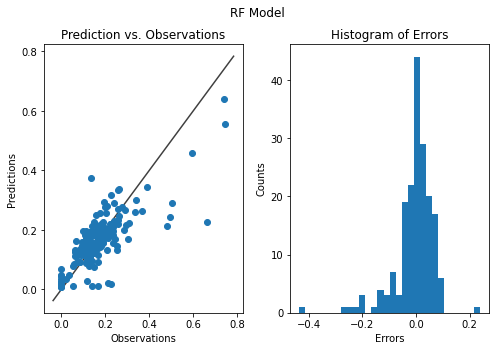

In [11]:
fig = plot_model_errors(y_test, rf_y_pred, 'RF Model')
fig.savefig('.\\output\\rf_model.png', dpi=100)

## Arquitetura 1:
Desc Arquitetura

In [ ]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [163]:
input_vars = X_train.shape[1]

model_1 = Sequential()
model_1.add(Dense(12,input_shape = (input_vars,),activation = 'tanh'))
model_1.add(Dense(8,activation = 'relu'))
model_1.add(Dense(3,activation = 'relu'))
model_1.add(Dense(3,activation = 'sigmoid'))
model_1.add(Dense(1,activation='linear'))
model_1.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_215 (Dense)           (None, 12)                312       
                                                                 
 dense_216 (Dense)           (None, 8)                 104       
                                                                 
 dense_217 (Dense)           (None, 3)                 27        
                                                                 
 dense_218 (Dense)           (None, 3)                 12        
                                                                 
 dense_219 (Dense)           (None, 1)                 4         
                                                                 
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [164]:
model_1.compile(RMSprop(learning_rate=0.001), "mean_absolute_error", metrics=["mean_absolute_error"])
run_hist_1 = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 1.1755 - mean_absolute_error: 1.1755 - val_loss: 1.1183 - val_mean_absolute_error: 1.1183
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 1.0749 - mean_absolute_error: 1.0749 - val_loss: 1.0176 - val_mean_absolute_error: 1.0176
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.9713 - mean_absolute_error: 0.9713 - val_loss: 0.9106 - val_mean_absolute_error: 0.9106
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.8614 - mean_absolute_error: 0.8614 - val_loss: 0.7956 - val_mean_absolute_error: 0.7956
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.7383 - mean_absolute_error: 0.7383 - val_loss: 0.6627 - val_mean_absolute_error: 0.6627
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5999 - mean_absolute_error: 0.5999 - val_loss: 0.5211 - val_mean_absolute_error: 0.5211
Epoch 7/100
18/18 [==

6/6 [==============================] - 0s 1ms/step


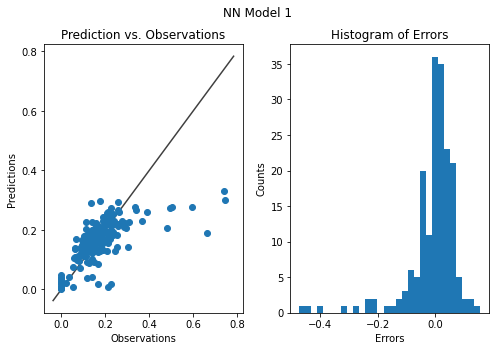

In [165]:
y_pred_model_1 = model_1.predict(X_test)
fig = plot_model_errors(y_test, y_pred_model_1[:,0], 'NN Model 1')
fig.savefig('.\\output\\nn1_errors.png', dpi=100)

In [166]:
def plot_nn_hist(nn_hist, title = ''):
    fig, ax = plt.subplots()
    ax.plot(nn_hist.history["loss"], marker='.', label="Train Loss")
    ax.plot(nn_hist.history["val_loss"], marker='.', label="Validation Loss")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Model loss')
    ax.set_title(title)
    ax.legend()
    return fig

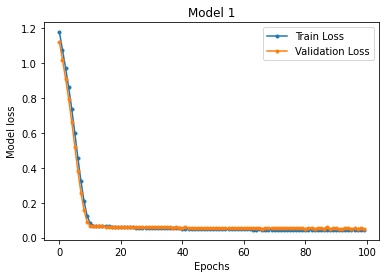

In [167]:
run_hist_1.history.keys()
hist1 = plot_nn_hist(run_hist_1, 'Model 1')

hist1.savefig('.\\output\\nn1_epochs.png', dpi=100)


Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, 12)                312       
                                                                 
 dense_221 (Dense)           (None, 16)                208       
                                                                 
 dense_222 (Dense)           (None, 8)                 136       
                                                                 
 dense_223 (Dense)           (None, 4)                 36        
                                                                 
 dense_224 (Dense)           (None, 1)                 5         
                                                                 
Total params: 697
Trainable params: 697
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
18/18 [==============================] - 1s 

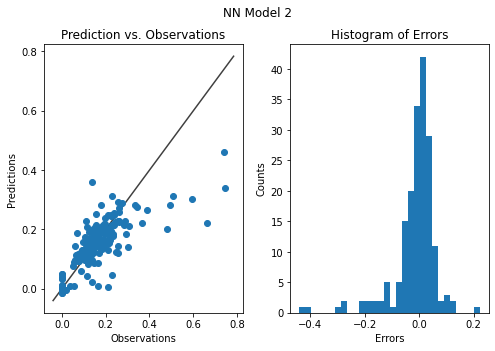

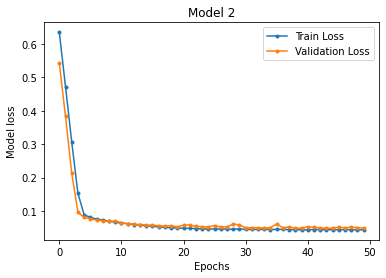

In [168]:
model_2 = Sequential()
model_2.add(Dense(12,input_shape = (input_vars,),activation = 'tanh'))
model_2.add(Dense(16,activation = 'relu'))
model_2.add(Dense(8,activation = 'relu'))
model_2.add(Dense(4,activation = 'sigmoid'))
model_2.add(Dense(1,activation='linear'))
model_2.summary()

model_2.compile(RMSprop(learning_rate=0.001), "mean_absolute_error", metrics=["mean_absolute_error"])
run_hist_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

y_pred_model_2 = model_2.predict(X_test)
fig = plot_model_errors(y_test, y_pred_model_2[:,0], 'NN Model 2')

run_hist_2.history.keys()
hist2 = plot_nn_hist(run_hist_2, 'Model 2')

fig.savefig('.\\output\\nn2_errors.png', dpi=100)
hist2.savefig('.\\output\\nn2_epochs.png', dpi=100)

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_225 (Dense)           (None, 120)               3120      
                                                                 
 dense_226 (Dense)           (None, 32)                3872      
                                                                 
 dense_227 (Dense)           (None, 32)                1056      
                                                                 
 dense_228 (Dense)           (None, 1)                 33        
                                                                 
Total params: 8,081
Trainable params: 8,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 1s 16ms/step - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 2/100
18/18 [==

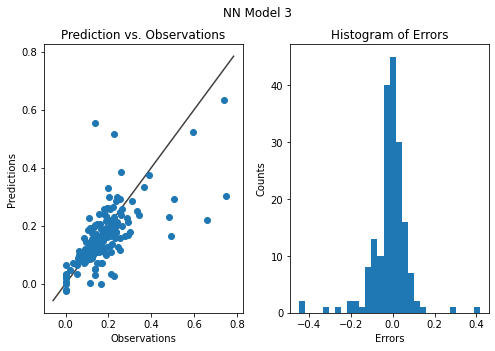

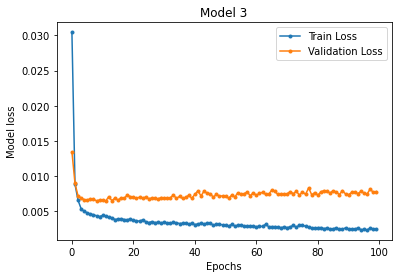

In [169]:
model_3 = Sequential()
model_3.add(Dense(120,input_shape = (input_vars,),activation = 'elu'))
model_3.add(Dense(32,activation = 'tanh'))
model_3.add(Dense(32,activation = 'relu'))
model_3.add(Dense(1,activation='linear'))
model_3.summary()

model_3.compile(Adam(learning_rate=0.0005), "mean_squared_error", metrics=["mean_squared_error"])
run_hist_3 = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

y_pred_model_3 = model_3.predict(X_test)
fig = plot_model_errors(y_test, y_pred_model_3[:,0], 'NN Model 3')

run_hist_3.history.keys()
hist3 = plot_nn_hist(run_hist_3, 'Model 3')

fig.savefig('.\\output\\nn3_errors.png', dpi=100)
hist3.savefig('.\\output\\nn3_epochs.png', dpi=100)


Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_229 (Dense)           (None, 12)                312       
                                                                 
 dense_230 (Dense)           (None, 16)                208       
                                                                 
 dense_231 (Dense)           (None, 16)                272       
                                                                 
 dense_232 (Dense)           (None, 1)                 17        
                                                                 
Total params: 809
Trainable params: 809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
18/18 [==============================] - 1s 9ms/step - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 2/100
18/18 [=======

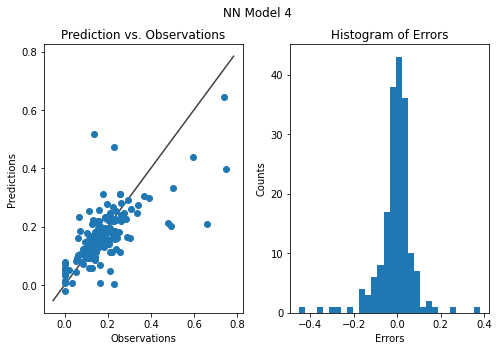

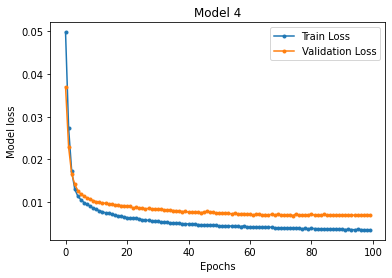

In [170]:
model_4 = Sequential()
model_4.add(Dense(12,input_shape = (input_vars,),activation = 'elu'))
model_4.add(Dense(16,activation = 'tanh'))
model_4.add(Dense(16,activation = 'relu'))
model_4.add(Dense(1,activation='linear'))
model_4.summary()

model_4.compile(Adam(learning_rate=0.0005), "mean_squared_error", metrics=["mean_squared_error"])
run_hist_4 = model_4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

y_pred_model_4 = model_4.predict(X_test)
fig = plot_model_errors(y_test, y_pred_model_4[:,0], 'NN Model 4')

run_hist_4.history.keys()
hist4 = plot_nn_hist(run_hist_4, 'Model 4')

fig.savefig('.\\output\\nn4_errors.png', dpi=100)
hist4.savefig('.\\output\\nn4_epochs.png', dpi=100)

def calc_loss(obs, pred):
    nrow = obs.shape[0]
    mse = sum((obs-pred)**2)**0.5/nrow
    mae = sum(abs(obs-pred))/nrow
    return mse, mae

mse_rf, mae_rf = calc_loss(y_test, rf_y_pred)
mse1, mae1 = calc_loss(y_test, y_pred_model_1[:,0])
mse2, mae2 = calc_loss(y_test, y_pred_model_2[:,0])
mse3, mae3 = calc_loss(y_test, y_pred_model_3[:,0])
mse4, mae4 = calc_loss(y_test, y_pred_model_4[:,0])
print(f'RF   --> mse: {round(mse_rf,4)} | mae: {round(mae_rf,3)}')
print(f'Mod1 --> mse: {round(mse1,4)} | mae: {round(mae1,3)}')
print(f'Mod2 --> mse: {round(mse2,4)} | mae: {round(mae2,3)}')
print(f'Mod3 --> mse: {round(mse3,4)} | mae: {round(mae3,3)}')
print(f'Mod4 --> mse: {round(mse4,4)} | mae: {round(mae4,3)}')

RF   --> mse: 0.0054 | mae: 0.047
Mod1 --> mse: 0.0064 | mae: 0.051
Mod2 --> mse: 0.006 | mae: 0.049
Mod3 --> mse: 0.0065 | mae: 0.053
Mod4 --> mse: 0.0062 | mae: 0.051


C:\Users\danil\AppData\Local\Temp/ipykernel_57864/3580992139.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


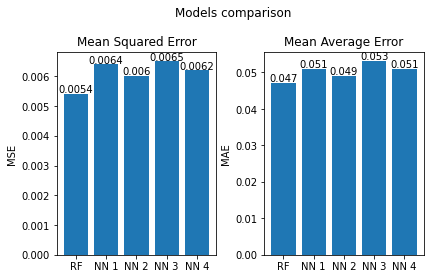

In [214]:
print(f'RF   --> mse: {round(mse_rf,4)} | mae: {round(mae_rf,3)}')
print(f'Mod1 --> mse: {round(mse1,4)} | mae: {round(mae1,3)}')
print(f'Mod2 --> mse: {round(mse2,4)} | mae: {round(mae2,3)}')
print(f'Mod3 --> mse: {round(mse3,4)} | mae: {round(mae3,3)}')
print(f'Mod4 --> mse: {round(mse4,4)} | mae: {round(mae4,3)}')

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.00005, y[i], ha = 'center')

mse_models = [round(mse_rf,4), round(mse1,4), round(mse2,4), round(mse3,4), round(mse4,4)]
mae_models = [
    round(mae_rf,3), 
    round(mae1,3), 
    round(mae2,3), 
    round(mae3,3), 
    round(mae4,3)]

bars = ('RF', 'NN 1', 'NN 2', 'NN 3', 'NN 4')
y_pos = np.arange(len(bars))

suptitle = 'Models comparison'
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(suptitle)
fig.tight_layout(pad=1.7)

ax1.bar(y_pos, mse_models)
ax1.set_title('Mean Squared Error')
ax1.set_xticks(y_pos)
ax1.set_xticklabels(bars)
ax1.set_ylabel('MSE')
for i in range(len(y_pos)):
    ax1.text(y_pos[i], mse_models[i] + 0.00005, mse_models[i], ha = 'center')


ax2.bar(y_pos, mae_models)
ax2.set_title('Mean Average Error')
ax2.set_ylabel('MAE')
ax2.set_xticks(y_pos)
ax2.set_xticklabels(bars)
for i in range(0,len(mae_models)):
    ax2.text(y_pos[i], mae_models[i] + 0.0005, mae_models[i], ha = 'center')


fig.show()
fig.savefig('.\\output\\models_comparison.png', dpi=100)


In [217]:
model_2.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, 12)                312       
                                                                 
 dense_221 (Dense)           (None, 16)                208       
                                                                 
 dense_222 (Dense)           (None, 8)                 136       
                                                                 
 dense_223 (Dense)           (None, 4)                 36        
                                                                 
 dense_224 (Dense)           (None, 1)                 5         
                                                                 
Total params: 697
Trainable params: 697
Non-trainable params: 0
_________________________________________________________________
